<a href="https://colab.research.google.com/github/madhavs06/Coursera_Capstone/blob/master/Week-5_Battle_of_Neighborhoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import** **required** **libraries**

In [3]:
import pandas as pd
import numpy as np
import requests
import os

import folium # For rendering maps

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # Acquiring latitude and longitude

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Imported Libraries.')

Imported Libraries.


**Create a function to fetch New York city data**

In [0]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    features=resp['features']
    
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

**Inspect the dataset**

In [5]:
df_ny= get_new_york_data()
df_ny.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [4]:
df_ny.shape

(306, 4)

**Exploratory Data Analysis of New York city neighborhood data**

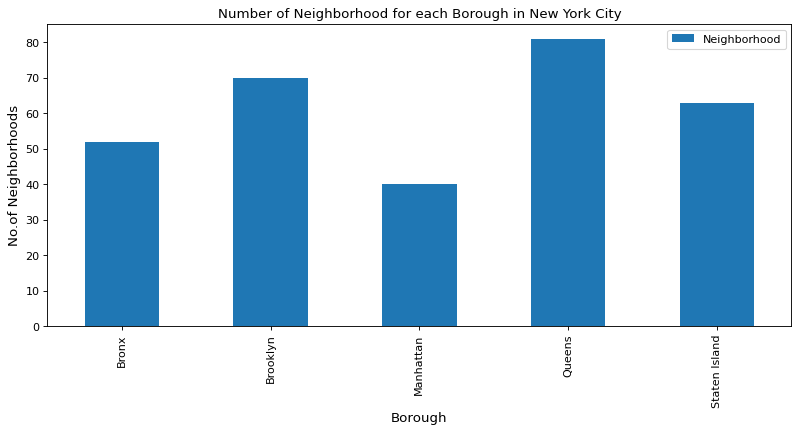

In [6]:
plt.figure(figsize=(12,5), dpi = 80)
plt.title('Number of Neighborhood for each Borough in New York City')
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('No.of Neighborhoods', fontsize=12)
df_ny.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
plt.legend()
plt.show()

**Create a function to fetch latitude and longitude from the location data**

In [0]:
def geo_location(address):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

**Create a function to fetch Foursquare venue details**

In [0]:
def get_venues(lat,lng):
    radius=1000
    LIMIT=100
    CLIENT_ID = 'RFKDZ2QEH4IXCZOGC0LV2FLRSEEB5E3413KIYAIM5KGVDYTV' #Foursquare ID
    CLIENT_SECRET = 'FZNBR4JD3VW4HTEKQUCPHPUJMHF5PZXXZNLVNGEQRZVCSMOZ' #Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
 
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_venue_details(venue_id):
        
    CLIENT_ID = 'RFKDZ2QEH4IXCZOGC0LV2FLRSEEB5E3413KIYAIM5KGVDYTV' #Foursquare ID
    CLIENT_SECRET = 'FZNBR4JD3VW4HTEKQUCPHPUJMHF5PZXXZNLVNGEQRZVCSMOZ' #Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
 
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [9]:
vns = get_venues(40.898273,-73.867315)
vns[vns['Category']=='Indian Restaurant']

,ID,Name,Category
3,4c0448d9310fc9b6bf1dc761,Curry Spot,Indian Restaurant


In [10]:
ind_res = vns[vns['Category']=='Indian Restaurant'].values.tolist()
ind_res

[['4c0448d9310fc9b6bf1dc761', 'Curry Spot', 'Indian Restaurant']]

In [11]:
for row in df_ny.values.tolist():
    print(row)

['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
['Bronx', 'Norwood', 40.87722415599446, -73.8793907395681]
['Bronx', 'Williamsbridge', 40.88103887819211, -73.85744642974207]
['Bronx', 'Baychester', 40.866858107252696, -73.83579759808117]
['Bronx', 'Pelham Parkway', 40.85741349808865, -73.85475564017999]
['Bronx', 'City Island', 40.84724670491813, -73.78648845267413]
['Bronx', 'Bedford Park', 40.870185164975325, -73.8855121841913]
['Bronx', 'University Heights', 40.85572707719664, -73.9104159619131]
['Bronx', 'Morris Heights', 40.847897926

**Neighborhoods with Indian restaurants**

In [13]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)

print('Indian restaurants in\n---------------------')
       
for row in df_ny.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']
    if len(indian_resturants) > 0:
        print(Neighborhood+', '+Borough+' : '+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)

print('Indian cuisine restaurants data set')

Indian restaurants in
---------------------
Woodlawn, Bronx : 1
Parkchester, Bronx : 1
Spuyten Duyvil, Bronx : 1
Concourse, Bronx : 1
Unionport, Bronx : 1
Bay Ridge, Brooklyn : 2
Brighton Beach, Brooklyn : 1
Flatbush, Brooklyn : 2
East Flatbush, Brooklyn : 1
Kensington, Brooklyn : 2
Prospect Heights, Brooklyn : 1
Gowanus, Brooklyn : 1
Fort Greene, Brooklyn : 1
Clinton Hill, Brooklyn : 1
Downtown, Brooklyn : 1
Prospect Lefferts Gardens, Brooklyn : 1
Ocean Hill, Brooklyn : 2
Prospect Park South, Brooklyn : 2
South Side, Brooklyn : 1
Fort Hamilton, Brooklyn : 1
Washington Heights, Manhattan : 1
Hamilton Heights, Manhattan : 2
Manhattanville, Manhattan : 2
Central Harlem, Manhattan : 2
East Harlem, Manhattan : 1
Yorkville, Manhattan : 2
Roosevelt Island, Manhattan : 1
Upper West Side, Manhattan : 1
Midtown, Manhattan : 2
Murray Hill, Manhattan : 1
Tribeca, Manhattan : 1
West Village, Manhattan : 1
Manhattan Valley, Manhattan : 3
Morningside Heights, Manhattan : 1
Gramercy, Manhattan : 7
As

In [14]:
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill


**A bargraph to visualize the number of Indian resturants in each borough of the New York City**

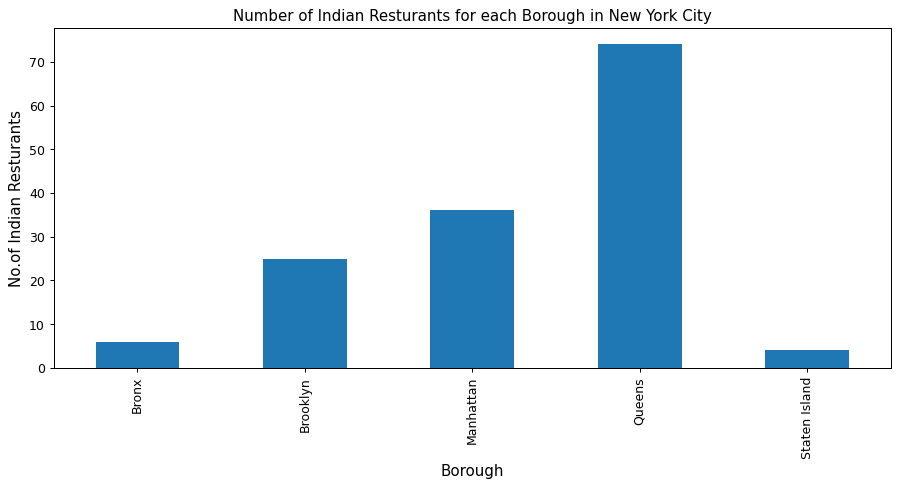

In [15]:
plt.figure(figsize=(12,5), dpi = 90)
plt.title('Number of Indian Resturants for each Borough in New York City')
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('No.of Indian Resturants', fontsize=12)
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
plt.show()

**Top 15 neighborhoodsas per the number of Indian restaurants**

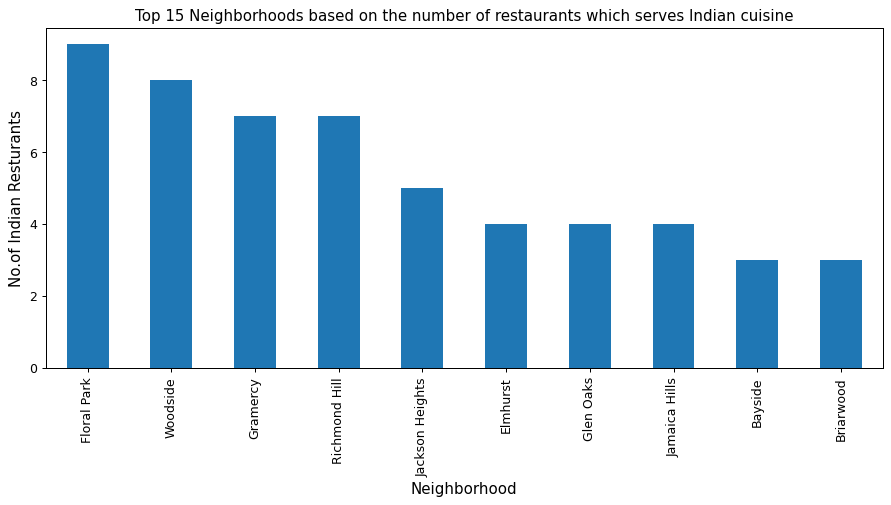

In [16]:
plt.figure(figsize=(12,5), dpi = 90)
plt.title('Top 15 Neighborhoods based on the number of restaurants which serves Indian cuisine')
plt.xlabel('Neighborhood', fontsize = 12)
plt.ylabel('No.of Indian Resturants', fontsize= 12)
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(10).plot(kind='bar')
plt.show()

**Let's explore the neighborhood *Floral Park* as it has the highest numbers of Indian restaurants**

In [17]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Floral Park']

,Borough,Neighborhood,ID,Name
103,Queens,Floral Park,527ffc0811d2d329d5e49abd,Jackson Diner
104,Queens,Floral Park,4e4e3e22bd4101d0d7a5c2d1,Kerala Kitchen
105,Queens,Floral Park,4b647b56f964a520c4b62ae3,Usha Foods & Usha Sweets
106,Queens,Floral Park,4b787c49f964a5209cd12ee3,Santoor Indian Restaurant
107,Queens,Floral Park,4c0c01e0bbc676b00d6b4cd5,Mumbai Xpress
108,Queens,Floral Park,4c76ff35a5676dcb72671721,Flavor Of India
109,Queens,Floral Park,4cc642ed306e224b5bf2a76c,Shahi Darbar
110,Queens,Floral Park,4df0f39dd4c04d0392c853ea,Sagar Chinese
111,Queens,Floral Park,4e6bfe1c7d8b2c711b17bbe5,Surya sweets and snacks


 **Let's fetch all the restaurant details from Fousquare**

In [18]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1

for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID        Name  Likes  Rating  Tips
0  4c0448d9310fc9b6bf1dc761  Curry Spot      5     7.8    10
( 1 / 145 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     6.0     2
( 2 / 145 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4c04544df423a593ac83d116  Cumin Indian Cuisine     13     6.0     9
( 3 / 145 ) processed
                         ID         Name  Likes  Rating  Tips
0  551b7f75498e86c00a0ed2e1  Hungry Bird      8     6.8     3
( 4 / 145 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     6.0     2
( 5 / 145 ) processed
                         ID       Name  Likes  Rating  Tips
0  4b5a4dc8f964a520a2bb28e3  Taj Mahal     38     8.0    26
( 6 / 145 ) processed
                         ID          Name  Likes

In [19]:
indian_rest_stats_ny.tail() 

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
140,Queens,Blissville,5b931ea69d7468002c3b1382,Adda,129,9.0,35
141,Brooklyn,Broadway Junction,5539753f498edbace4746b67,Tandoori Masala,12,7.9,2
142,Brooklyn,Erasmus,564d283d498e6e851df79d87,Great Indian Curry,3,6.9,2
143,Queens,Queensbridge,50a287a7e4b0033f830f06db,Raj's Indian Kitchen,25,7.7,12
144,Queens,Queensbridge,4b1b341bf964a5208af923e3,Five Star Banquet,30,7.0,31


In [20]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       145 non-null    object 
 1   Neighborhood  145 non-null    object 
 2   ID            145 non-null    object 
 3   Name          145 non-null    object 
 4   Likes         145 non-null    object 
 5   Rating        145 non-null    float64
 6   Tips          145 non-null    object 
dtypes: float64(1), object(6)
memory usage: 8.1+ KB


In [21]:
convert_types = { 'Likes': float, 'Tips': float }
indian_rest_stats_ny = indian_rest_stats_ny.astype(convert_types)
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       145 non-null    object 
 1   Neighborhood  145 non-null    object 
 2   ID            145 non-null    object 
 3   Name          145 non-null    object 
 4   Likes         145 non-null    float64
 5   Rating        145 non-null    float64
 6   Tips          145 non-null    float64
dtypes: float64(3), object(4)
memory usage: 8.1+ KB


**Indian restaurants with most tips**

In [22]:
  indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                    Gramercy
ID              4a12eb1ff964a52099771fe3
Name                               Dhaba
Likes                                497
Rating                               8.3
Tips                                 164
Name: 49, dtype: object

**Indian restaurants with highest ratings**

In [23]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                           Queens
Neighborhood                     Astoria
ID              4aa56c81f964a5204e4820e3
Name                 Seva Indian Cuisine
Likes                                239
Rating                                 9
Tips                                 133
Name: 53, dtype: object

**Most liked Indian restaurant**

In [24]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                590
Rating                               8.6
Tips                                 148
Name: 40, dtype: object

In [25]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Astoria,9.000000
1,Astoria Heights,0.000000
2,Bay Ridge,7.550000
3,Bayside,7.700000
4,Bellaire,0.000000
5,Bellerose,0.000000
6,Blissville,9.000000
7,Briarwood,7.533333
8,Brighton Beach,7.500000
9,Broadway Junction,7.900000


**List of Top 10 neighborhoods in order of average rating of Indian cuisine restaurants**

In [26]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
0,Astoria,9.0
6,Blissville,9.0
64,Sunnyside,9.0
13,Clinton Hill,8.8
25,Fort Greene,8.8
74,West Village,8.7
52,Prospect Lefferts Gardens,8.7
51,Prospect Heights,8.7
68,Tribeca,8.6
12,Civic Center,8.6


In [0]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

**Bouroughs having highest average rating of Indian restaurants**

In [28]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.180556
4,Staten Island,8.000000
1,Brooklyn,7.780000
3,Queens,6.578378
0,Bronx,6.566667


**Barchart for restaurants with average ratings based on boroughs**

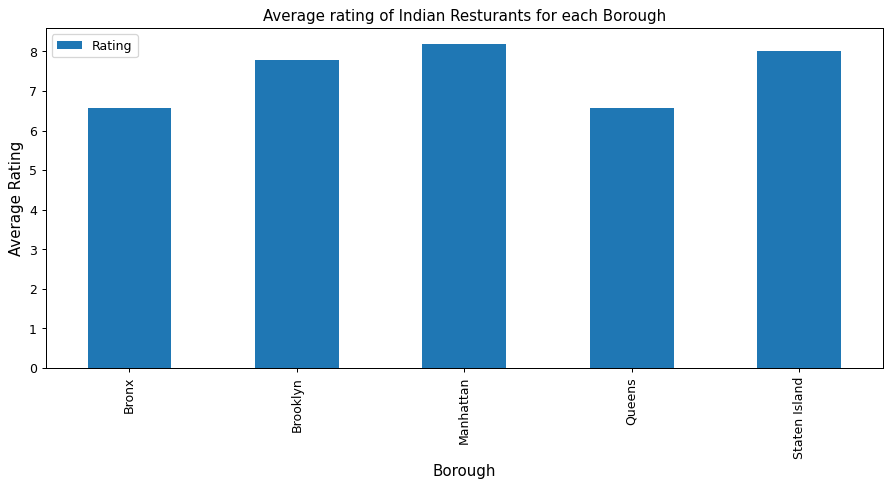

In [29]:
plt.figure(figsize=(12,5), dpi = 90)
plt.title('Average rating of Indian Resturants for each Borough')
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('Average Rating', fontsize=12)
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
plt.legend()
plt.show()

**List of neighborhoods with average rating greater than or equal to 8.5 for Indian cuisine**

In [30]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.5]
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Astoria,9.0
6,Blissville,9.0
12,Civic Center,8.6
13,Clinton Hill,8.8
25,Fort Greene,8.8
32,Holliswood,8.5
44,Murray Hill,8.6
47,Noho,8.5
51,Prospect Heights,8.7
52,Prospect Lefferts Gardens,8.7


In [0]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,df_ny, on='Neighborhood')

In [32]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Astoria,40.768509,-73.915654,9.0
1,Queens,Blissville,40.737251,-73.932442,9.0
2,Manhattan,Civic Center,40.715229,-74.005415,8.6
3,Brooklyn,Clinton Hill,40.693229,-73.967843,8.8
4,Brooklyn,Fort Greene,40.688527,-73.972906,8.8
5,Queens,Holliswood,40.720957,-73.767142,8.5
6,Manhattan,Murray Hill,40.748303,-73.978332,8.6
7,Queens,Murray Hill,40.764126,-73.812763,8.6
8,Manhattan,Noho,40.723259,-73.988434,8.5
9,Brooklyn,Prospect Heights,40.676822,-73.964859,8.7


**Creating a map of New York**

In [33]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_map

In [0]:
incidents = folium.map.FeatureGroup()

for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='#EA1253',
            fill=True,
            fill_color='#12EA92',
            fill_opacity=0.4
        )
    )

In [35]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating,Label
0,Queens,Astoria,40.768509,-73.915654,9.0,"Astoria, Queens(9.0)"
1,Queens,Blissville,40.737251,-73.932442,9.0,"Blissville, Queens(9.0)"
2,Manhattan,Civic Center,40.715229,-74.005415,8.6,"Civic Center, Manhattan(8.6)"
3,Brooklyn,Clinton Hill,40.693229,-73.967843,8.8,"Clinton Hill, Brooklyn(8.8)"
4,Brooklyn,Fort Greene,40.688527,-73.972906,8.8,"Fort Greene, Brooklyn(8.8)"
5,Queens,Holliswood,40.720957,-73.767142,8.5,"Holliswood, Queens(8.5)"
6,Manhattan,Murray Hill,40.748303,-73.978332,8.6,"Murray Hill, Manhattan(8.6)"
7,Queens,Murray Hill,40.764126,-73.812763,8.6,"Murray Hill, Queens(8.6)"
8,Manhattan,Noho,40.723259,-73.988434,8.5,"Noho, Manhattan(8.5)"
9,Brooklyn,Prospect Heights,40.676822,-73.964859,8.7,"Prospect Heights, Brooklyn(8.7)"


**Visualize the boroughs and top restaurants**

In [36]:
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
ny_map.add_child(incidents)

**Choropleth graph based on above**

In [0]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=11)
ny_geo = r'geo-boundaries.json'

ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlGnBu',
    fill_opacity=0.6, 
    line_opacity=0.4,
    legend_name='Average Rating',
    smooth_factor= 0
)

ny_map.save('rated-map.html')